## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [2]:
## Introduction
## To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.

In [8]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows to understand the structure
#print(data.head())
data.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [10]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns: ", numerical_cols)

Numerical Columns:  Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [12]:
# Descriptive statistics for numerical columns
mean_vals = data[numerical_cols].mean()
print("Mean Values:\n", mean_vals)
median_vals = data[numerical_cols].median()
print("Median Values:\n", median_vals)
mode_vals = data[numerical_cols].mode().iloc[0]  # Mode can have multiple values, selecting the first
print("Mode Values:\n", mode_vals)
std_vals = data[numerical_cols].std()
print("Standard Deviation:\n", std_vals)

Mean Values:
 Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Median Values:
 Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Mode Values:
 Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
Standard Deviation:
 Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


## Briefly interpret the results obtained from the calculations:

### If the mean of the discount_rate column is significantly lower than the median, it may suggest that there are some high outliers in the discount values.
    
### A high standard deviation in the sales_amount column could suggest that sales amounts vary greatly between transactions.

## Data Visualization

### Histograms for Numerical Columns

In [22]:
## Histograms are useful to understand the distribution of numerical variables, including skewness and the presence of outliers.

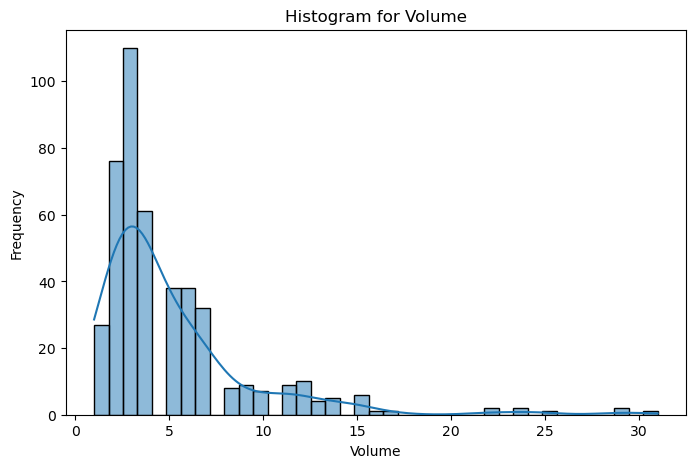

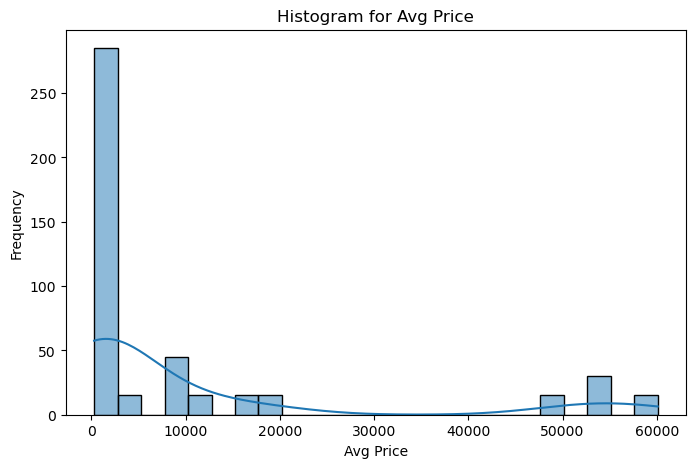

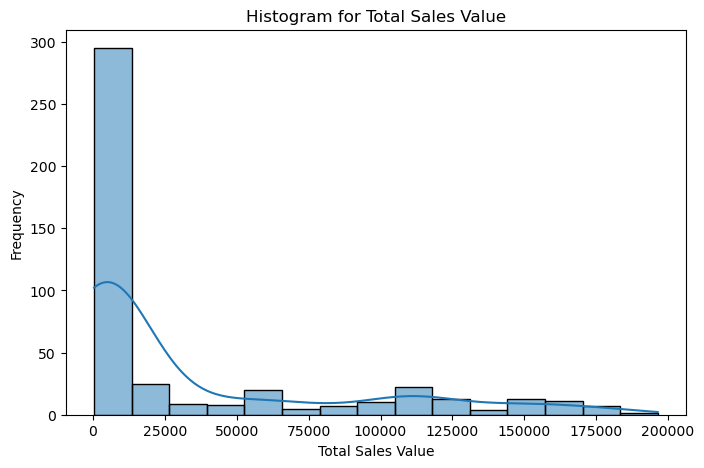

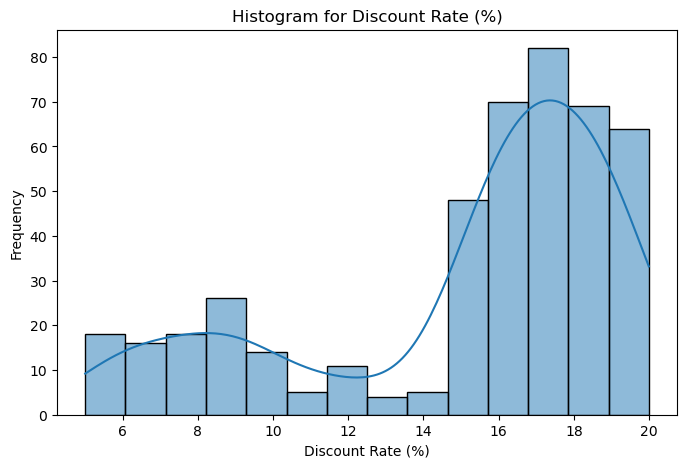

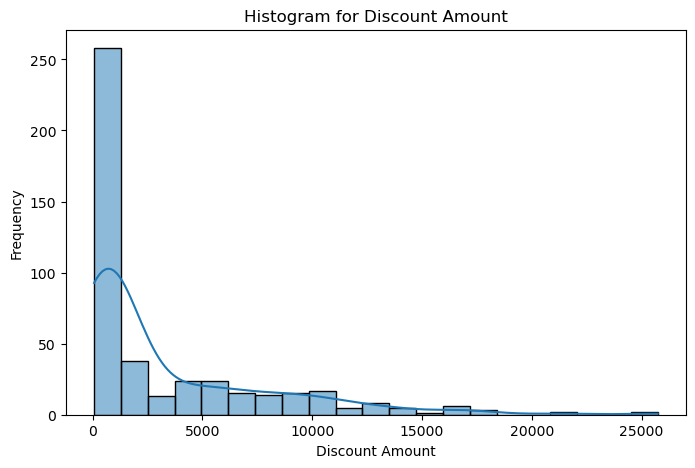

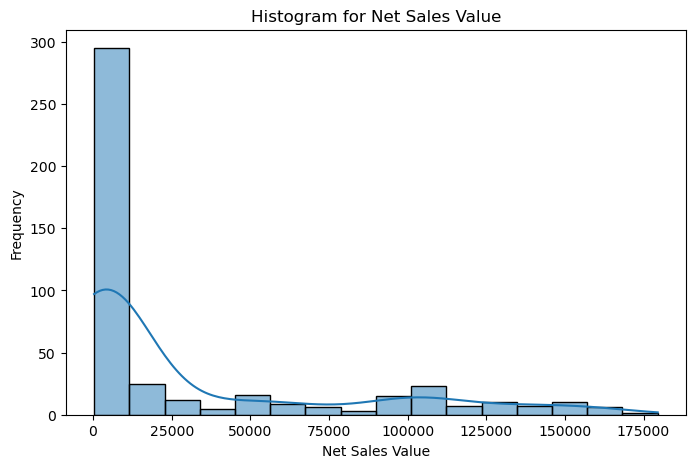

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Analysis of Histograms:


In [27]:
## Histogram Right-skewed graphs are volume,Avg price,total sales value,discount amount,Net sales Values.
## Histogram Left-skewed graph is discount rate(%).
## Outliers: volume and Avg Price graphs contains outliers.

## Boxplots for Numerical Columns

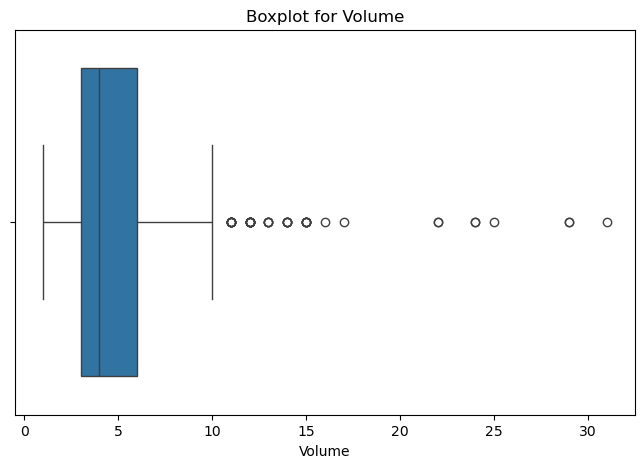

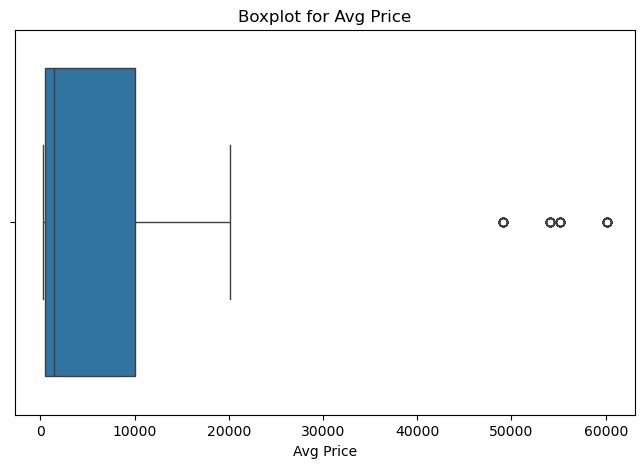

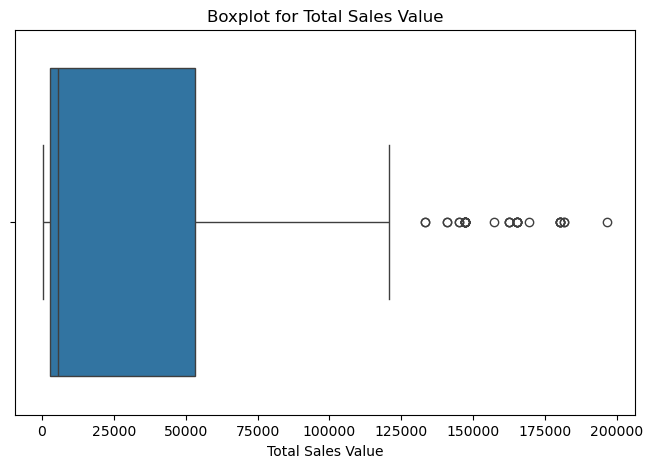

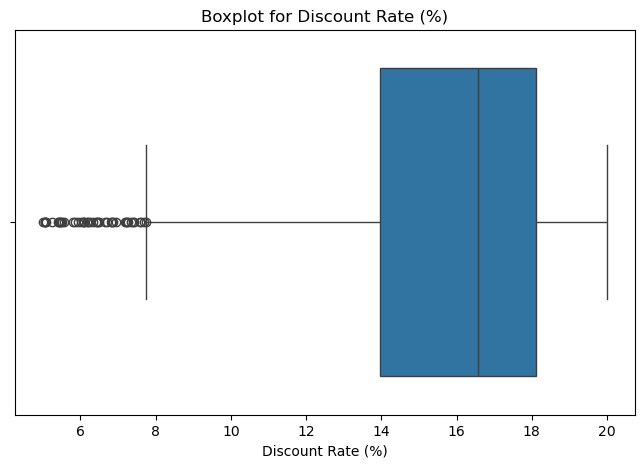

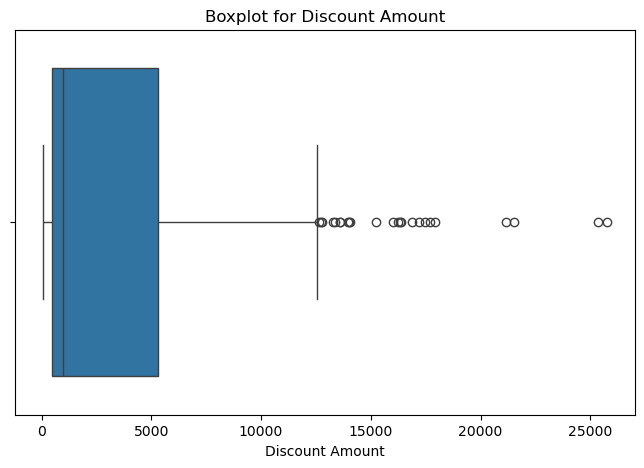

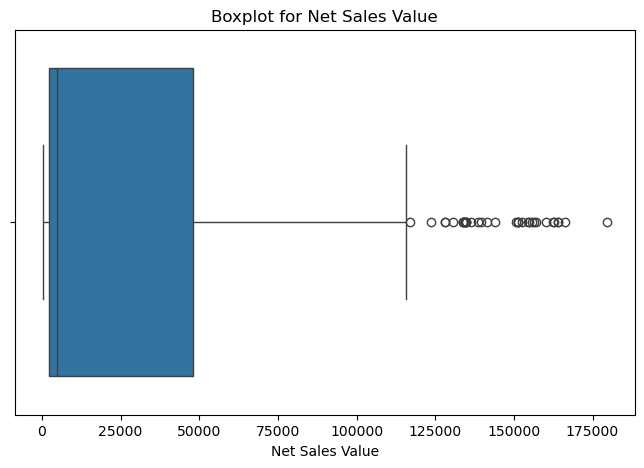

In [29]:
# Create boxplots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

## Bar Chart Analysis for Categorical Columns

Categorical Columns:  Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


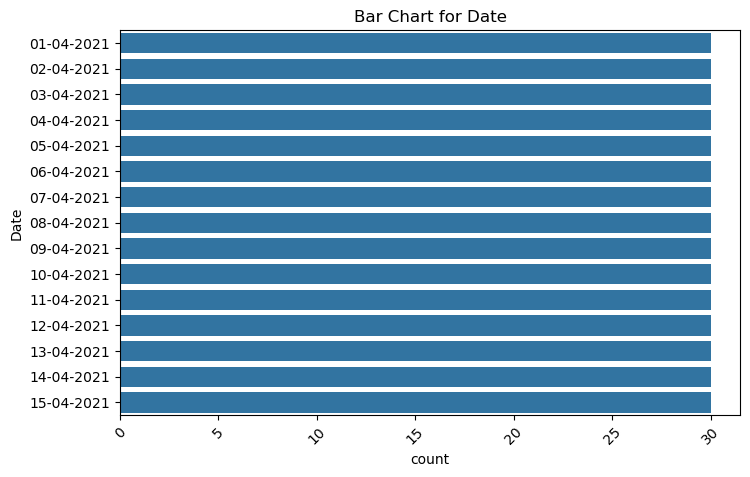

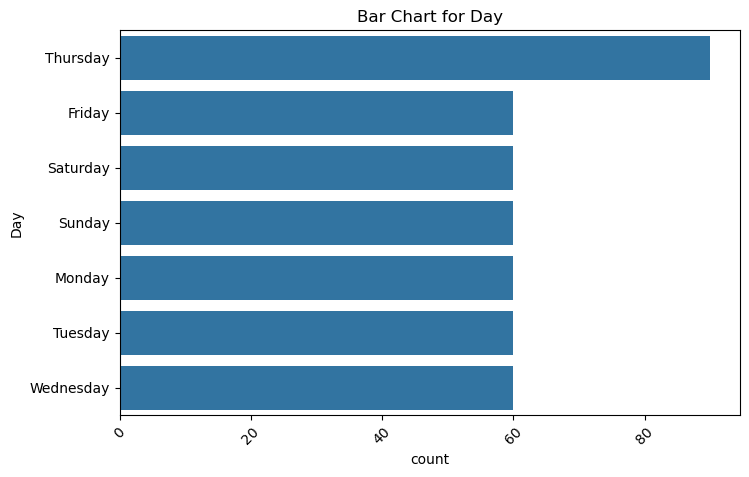

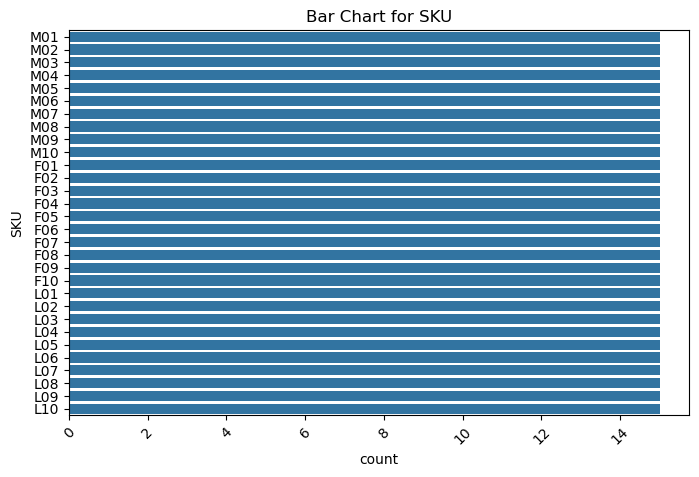

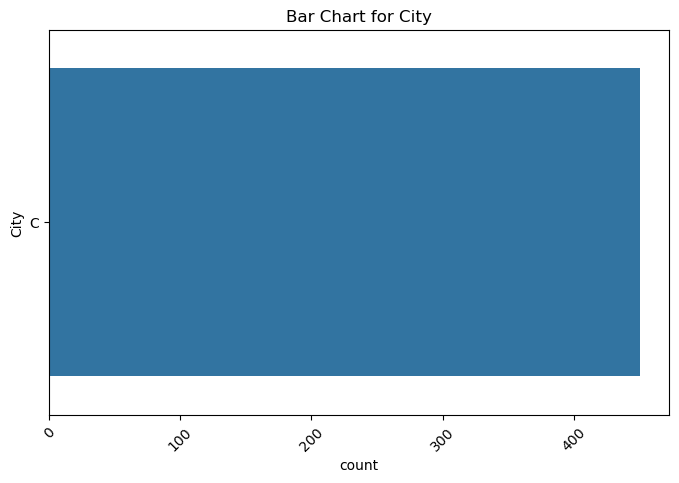

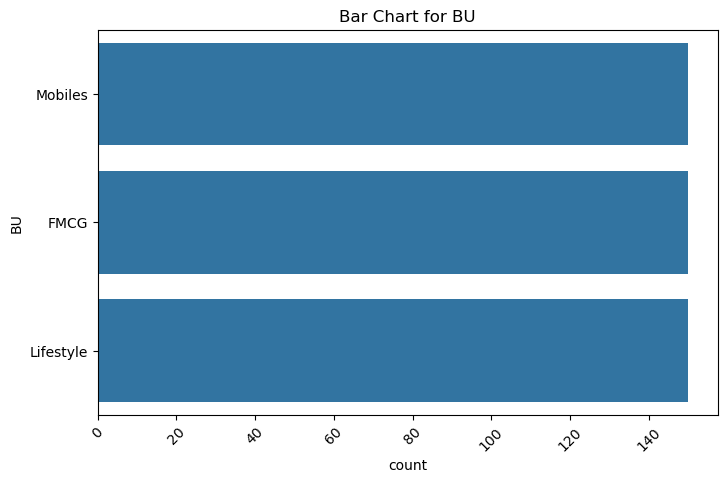

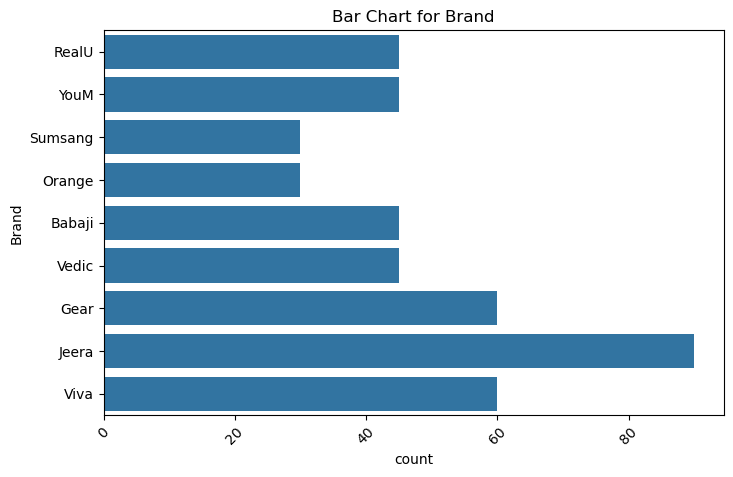

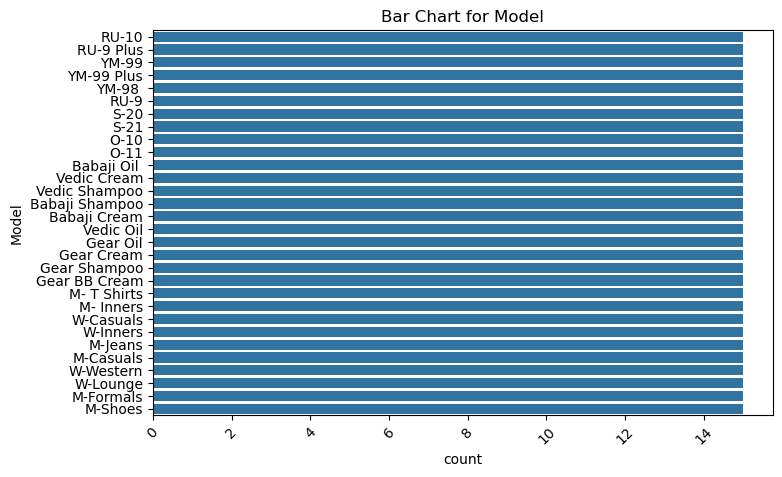

In [33]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns: ", categorical_cols)

# Create bar charts for each categorical column
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data[col])
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=45)
    plt.show()

## Standardization of Numerical Variables

In [38]:
from sklearn.preprocessing import StandardScaler

# Before standardization: display first few rows of numerical columns
print("Before Standardization:\n", data[numerical_cols].head())

# Standardize the numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# After standardization: display first few rows of standardized numerical columns
print("After Standardization:\n", data[numerical_cols].head())

Before Standardization:
    Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  
0    160346.501180  
1     89323.897039  
2    102042.089843  
3    112235.925298  
4     19927.053770  
After Standardization:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146    

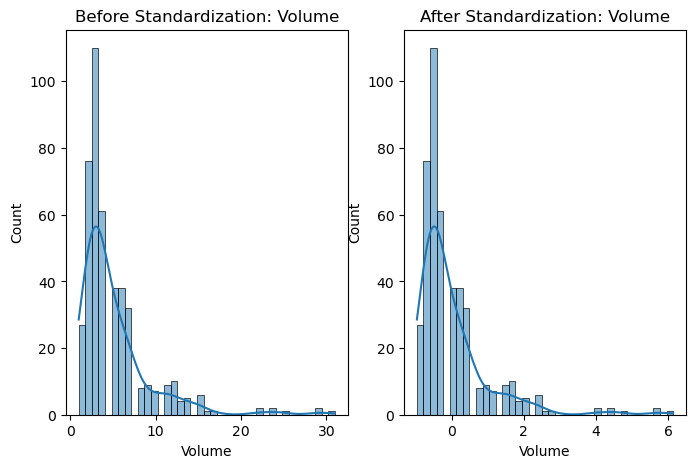

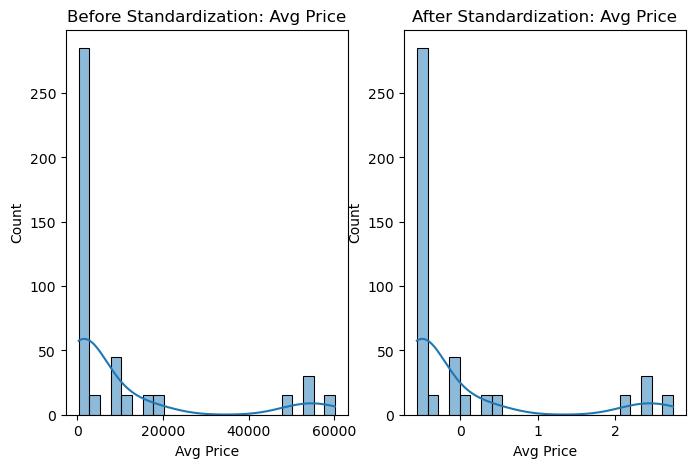

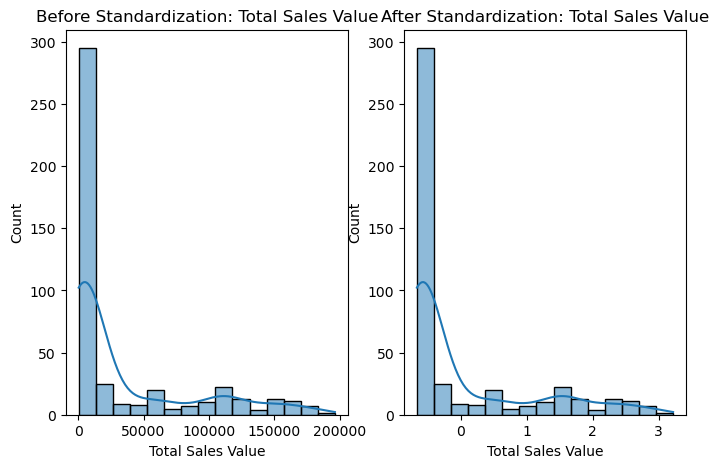

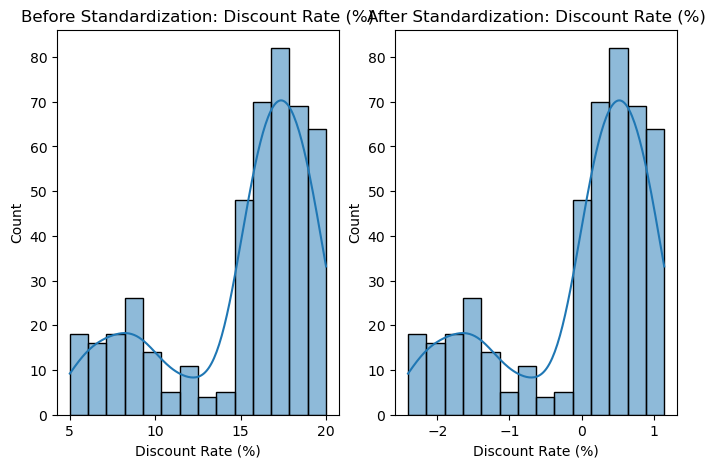

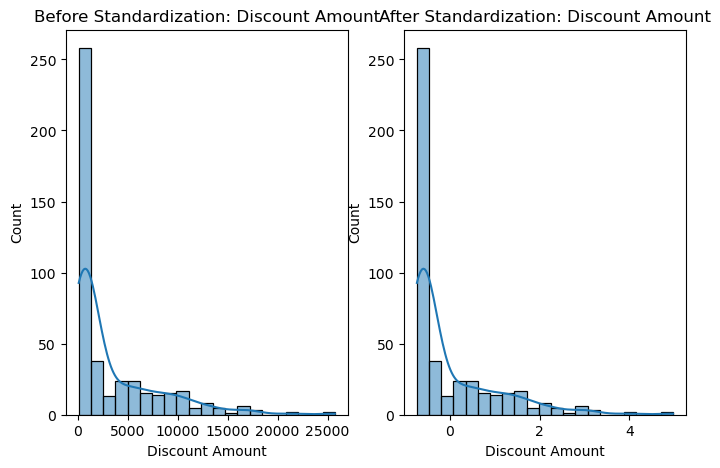

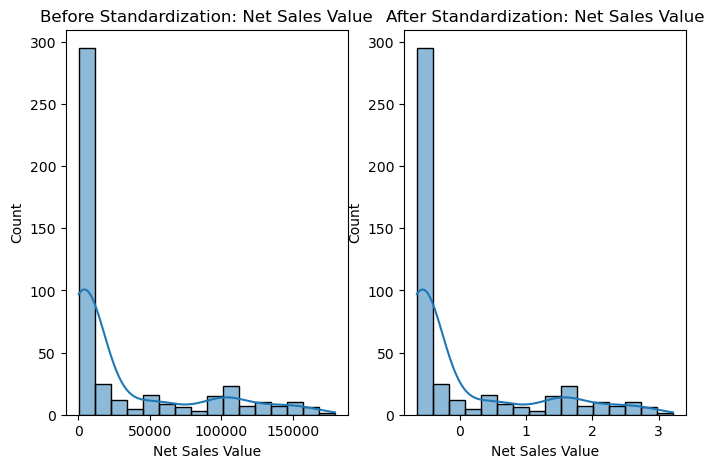

In [40]:
# Plot histograms before and after standardization
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    
    # Histogram before standardization
    plt.subplot(1, 2, 1)
    sns.histplot(data[col] * scaler.scale_[numerical_cols.get_loc(col)] + scaler.mean_[numerical_cols.get_loc(col)], kde=True)
    plt.title(f'Before Standardization: {col}')
    
    # Histogram after standardization
    plt.subplot(1, 2, 2)
    sns.histplot(data[col], kde=True)
    plt.title(f'After Standardization: {col}')
    
    plt.show()

## Conversion of Categorical Data into Dummy Variables

In [43]:
# One-hot encoding the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)  # drop_first avoids multicollinearity
print("One-hot Encoded Data:\n", data_encoded.head())

One-hot Encoded Data:
      Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  2.350029   0.091173           2.925721          -0.830289         3.952816   
1  1.167129  -0.019570           1.330995          -0.852661         1.849014   
2  0.457388   0.312659           1.562775          -1.351631         1.622995   
3  0.220808   0.534146           1.719276          -1.949723         1.113807   
4 -0.488932  -0.130313          -0.188452           0.673739         0.227852   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0         2.804756            False            False            False   
1         1.271026            False            False            False   
2         1.545675            False            False            False   
3         1.765810            False            False            False   
4        -0.227595            False            False            False   

   Date_05-04-2021  ...  Model_Vedic Cream  Model_V

## Conclusion

### Distribution of Numerical Variables: The histograms revealed skewness in the graphs, suggesting the presence of outliers.
### Outliers and Spread: Boxplots showed significant outliers in the dataset, particularly in the discount_rate column, which could skew the analysis if not addressed.

## Importance of Data Preprocessing

### Standardization: Standardizing the numerical variables ensures uniformity across features, improving the performance and accuracy of algorithms sensitive to scale (e.g., KNN, SVM).
### One-Hot Encoding: Converting categorical data into dummy variables is crucial for machine learning models. Without this step, models would be unable to interpret categorical data, reducing their predictive power.